In [1]:
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error  # 루트 제곱 평균 오차
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.preprocessing import StandardScaler  # 평균 0, 표준편차 1
from sklearn.preprocessing import MinMaxScaler  # 백분위
from sklearn.preprocessing import RobustScaler

In [ ]:
file_url = (
    "https://media.githubusercontent.com/media/musthave-ML10/data_source/main/fraud.csv"
)

data = pd.read_csv(file_url)
print(data.shape)

(1852394, 22)


In [ ]:
data


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [ ]:
data.drop(["first","last","street","city","state","zip","trans_num","unix_time","job","merchant"],axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   category               object 
 3   amt                    float64
 4   gender                 object 
 5   lat                    float64
 6   long                   float64
 7   city_pop               int64  
 8   dob                    object 
 9   merch_lat              float64
 10  merch_long             float64
 11  is_fraud               int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 169.6+ MB


In [ ]:
data["trans_date_trans_time"] = pd.to_datetime(data["trans_date_trans_time"])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 12 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   category               object        
 3   amt                    float64       
 4   gender                 object        
 5   lat                    float64       
 6   long                   float64       
 7   city_pop               int64         
 8   dob                    object        
 9   merch_lat              float64       
 10  merch_long             float64       
 11  is_fraud               int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(3)
memory usage: 169.6+ MB


In [ ]:
data.describe()

,trans_date_trans_time,cc_num,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,1852394,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,2020-01-20 21:31:46.801827328,4.173860e+17,7.006357e+01,3.853931e+01,-9.022783e+01,8.864367e+04,3.853898e+01,-9.022794e+01,5.210015e-03
min,2019-01-01 00:00:18,6.041621e+10,1.000000e+00,2.002710e+01,-1.656723e+02,2.300000e+01,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2019-07-23 04:13:43.750000128,1.800429e+14,9.640000e+00,3.466890e+01,-9.679800e+01,7.410000e+02,3.474012e+01,-9.689944e+01,0.000000e+00
50%,2020-01-02 01:15:31,3.521417e+15,4.745000e+01,3.935430e+01,-8.747690e+01,2.443000e+03,3.936890e+01,-8.744069e+01,0.000000e+00
75%,2020-07-23 12:11:25.249999872,4.642255e+15,8.310000e+01,4.194040e+01,-8.015800e+01,2.032800e+04,4.195626e+01,-8.024511e+01,0.000000e+00
max,2020-12-31 23:59:34,4.992346e+18,2.894890e+04,6.669330e+01,-6.795030e+01,2.906700e+06,6.751027e+01,-6.695090e+01,1.000000e+00
std,NaN,1.309115e+18,1.592540e+02,5.071470e+00,1.374789e+01,3.014876e+05,5.105604e+00,1.375969e+01,7.199217e-02


In [ ]:
amt_info = data.groupby("cc_num")["amt"].agg(["mean", "std"]).reset_index()

In [32]:
amt_info

,cc_num,mean,std
0,60416207185,59.257796,142.869746
1,60422928733,65.483159,92.042844
2,60423098130,96.376084,1000.693872
3,60427851591,107.487550,131.014534
4,60487002085,64.096925,153.207660
...,...,...,...
994,4958589671582726883,67.205600,137.504101
995,4973530368125489546,75.789148,258.847061
996,4980323467523543940,70.709484,119.903167
997,4989847570577635369,93.008939,128.396760


In [ ]:
data = data.merge(amt_info,on="cc_num",how="left")
data.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,mean,std
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,89.408743,127.530101
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,56.078113,159.201852
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,69.924272,116.688602
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,80.090040,280.077880
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,95.341146,94.322842


In [ ]:
data["amt_z_score"] = (data["amt"] - data["mean"]) / data["std"]

In [ ]:
data[["amt","amt_z_score","mean","std"]].head()

,amt,amt_z_score,mean,std
0,4.97,-0.662108,89.408743,127.530101
1,107.23,0.321302,56.078113,159.201852
2,220.11,1.287064,69.924272,116.688602
3,45.00,-0.125287,80.090040,280.077880
4,41.96,-0.565941,95.341146,94.322842


In [ ]:
data.drop(["mean","std"],axis=1,inplace=True)

In [ ]:
data.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z_score
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,-0.662108
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,1.287064
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,-0.125287
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,-0.565941


In [ ]:
category_info = data.groupby(["cc_num","category"])["amt"].agg(["mean","std"]).reset_index()


In [51]:
category_info.head(2)

,cc_num,category,mean,std
0,60416207185,entertainment,51.838855,65.485714
1,60416207185,food_dining,26.737097,46.382603


In [ ]:
data = data.merge(category_info,on=["cc_num","category"],how="left")

In [ ]:
data.head(2)

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z_score,mean,std
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,-0.662108,84.860809,116.070300
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,99.637224,23.904424


In [ ]:
data["cat_z_score"] = (data["amt"]-data["mean"])/data["std"]

In [ ]:
data.head(2)

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z_score,mean,std,cat_z_score
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,-0.662108,84.860809,116.070300,-0.688297
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,99.637224,23.904424,0.317631


In [ ]:
data.drop(["mean","std"],axis=1,inplace=True)

In [ ]:
data.head(1)

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z_score,cat_z_score
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,-0.662108,-0.688297


In [59]:
!uv add geopy

Resolved 123 packages in 1.33s
Prepared 2 packages in 200ms
Installed 2 packages in 181ms
 + geographiclib==2.0
 + geopy==2.4.1


In [60]:
import geopy.distance

In [ ]:
zip(data["merch_lat"],data["merch_long"])

In [ ]:
data["merch_coord"] = pd.Series(zip(data["merch_lat"],data["merch_long"]))
data["cust_coord"] = pd.Series(zip(data["lat"],data["long"]))

In [ ]:
data[["merch_coord","cust_coord"]]

,merch_coord,cust_coord
0,"(36.011293, -82.048315)","(36.0788, -81.1781)"
1,"(49.159047, -118.186462)","(48.8878, -118.2105)"
2,"(43.150704, -112.154481)","(42.1808, -112.262)"
3,"(47.034331, -112.561071)","(46.2306, -112.1138)"
4,"(38.674999, -78.632459)","(38.4207, -79.4629)"
...,...,...
1852389,"(39.946837, -91.333331)","(40.4931, -91.8912)"
1852390,"(29.661049, -96.186633)","(29.0393, -95.4401)"
1852391,"(46.65834, -119.715054)","(46.1966, -118.9017)"
1852392,"(44.470525, -117.080888)","(44.6255, -116.4493)"


In [ ]:
geopy.distance.distance(data['merch_coord'][0],data["cust_coord"][0])

Distance(78.77382075373654)

In [ ]:
type(data["merch_coord"][0])

tuple

In [ ]:
data["distance"] = data.apply(
    lambda x:geopy.distance.distance(x["merch_coord"],x["cust_coord"]).km,
    axis=1
)

In [ ]:
data[data["is_fraud"]==1][["distance","is_fraud"]]

,distance,is_fraud
2449,68.962726,1
2472,78.443229,1
2523,41.048425,1
2546,34.211963,1
2553,44.124854,1
...,...,...
1813872,6.932947,1
1813949,75.904658,1
1814016,36.615178,1
1814204,48.901315,1


In [ ]:

data.distance.describe()

count    1.852394e+06
mean     7.610956e+01
std      2.909273e+01
min      2.227351e-02
25%      5.534198e+01
50%      7.824823e+01
75%      9.847204e+01
max      1.518682e+02
Name: distance, dtype: float64

In [ ]:
distance_inf = data.groupby("cc_num")["distance"].agg(['mean',"std"]).reset_index()
data =data.merge(distance_inf,on = "cc_num",how="left")
data["distance_z_score"] = (data["distance"]-data["mean"]) / data["std"]
data.drop(["mean","std"],axis=1 , inplace=True)

In [ ]:
data.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z_score,cat_z_score,merch_coord,cust_coord,distance,distance_z_score
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,-0.662108,-0.688297,"(36.011293, -82.048315)","(36.0788, -81.1781)",78.773821,0.030974
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631,"(49.159047, -118.186462)","(48.8878, -118.2105)",30.216618,-1.475224
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,1.287064,2.872509,"(43.150704, -112.154481)","(42.1808, -112.262)",108.102912,1.160572
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,-0.125287,-1.050197,"(47.034331, -112.561071)","(46.2306, -112.1138)",95.685115,0.818063
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,-0.565941,1.312866,"(38.674999, -78.632459)","(38.4207, -79.4629)",77.702395,0.064037


In [ ]:
data[["amt","amt_z_score","cat_z_score","distance","distance_z_score"]].describe()

,amt,amt_z_score,cat_z_score,distance,distance_z_score
count,1.852394e+06,1.852394e+06,1.852175e+06,1.852394e+06,1.852394e+06
mean,7.006357e+01,8.745642e-19,8.742840e-18,7.610956e+01,-2.433820e-18
std,1.592540e+02,9.997306e-01,9.964977e-01,2.909273e+01,9.997306e-01
min,1.000000e+00,-2.825078e+00,-1.286527e+01,2.227351e-02,-2.781230e+00
25%,9.640000e+00,-3.817990e-01,-5.282273e-01,5.534198e+01,-7.129175e-01
50%,4.745000e+01,-1.758245e-01,-2.355774e-01,7.824823e+01,7.619663e-02
75%,8.310000e+01,9.131632e-02,2.891649e-01,9.847204e+01,7.666222e-01
max,2.894890e+04,6.342123e+01,1.890049e+01,1.518682e+02,2.627857e+00


In [ ]:
data.trans_date_trans_time.max()

Timestamp('2020-12-31 23:59:34')

In [ ]:
pd.to_datetime(data["dob"])


0         1988-03-09
1         1978-06-21
2         1962-01-19
3         1967-01-12
4         1986-03-28
             ...    
1852389   1966-02-13
1852390   1999-12-27
1852391   1981-11-29
1852392   1965-12-15
1852393   1993-05-10
Name: dob, Length: 1852394, dtype: datetime64[ns]

In [ ]:
data["age"] = 2021 - pd.to_datetime(data["dob"]).dt.year

In [ ]:
data["age"]

0          33
1          43
2          59
3          54
4          35
           ..
1852389    55
1852390    22
1852391    40
1852392    56
1852393    28
Name: age, Length: 1852394, dtype: int32

In [ ]:
data["age"].value_counts()

age
49    65036
37    56964
34    53377
36    53335
47    48984
      ...  
89     2965
16     2922
97      735
19       12
96       11
Name: count, Length: 82, dtype: int64

In [ ]:
data.head(2)

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z_score,cat_z_score,merch_coord,cust_coord,distance,distance_z_score,age
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,-0.662108,-0.688297,"(36.011293, -82.048315)","(36.0788, -81.1781)",78.773821,0.030974,33
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631,"(49.159047, -118.186462)","(48.8878, -118.2105)",30.216618,-1.475224,43


In [ ]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'category', 'amt', 'gender', 'lat',
       'long', 'city_pop', 'dob', 'merch_lat', 'merch_long', 'is_fraud',
       'amt_z_score', 'cat_z_score', 'merch_coord', 'cust_coord', 'distance',
       'distance_z_score', 'age'],
      dtype='object')

In [ ]:
data = data[
    [
        "trans_date_trans_time",
        "category",
        "amt",
        "gender",
        "city_pop",
        "is_fraud",
        "amt_z_score",
        "cat_z_score",
        "distance",
        "distance_z_score",
        "age"
    ]].copy()


KeyError: "['trans_date_trans_time', 'category', 'gender'] not in index"

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1852394 entries, 2019-01-01 00:00:18 to 2020-12-31 23:59:34
Data columns (total 23 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   amt                      float64
 1   city_pop                 int64  
 2   dob                      object 
 3   is_fraud                 int64  
 4   amt_z_score              float64
 5   cat_z_score              float64
 6   distance                 float64
 7   distance_z_score         float64
 8   age                      int32  
 9   category_food_dining     bool   
 10  category_gas_transport   bool   
 11  category_grocery_net     bool   
 12  category_grocery_pos     bool   
 13  category_health_fitness  bool   
 14  category_home            bool   
 15  category_kids_pets       bool   
 16  category_misc_net        bool   
 17  category_misc_pos        bool   
 18  category_personal_care   bool   
 19  category_shopping_net    bool   
 20  category_shop

In [ ]:
data = pd.get_dummies(data,columns=["category","gender"],drop_first=True)

KeyError: "None of [Index(['category', 'gender'], dtype='object')] are in the [columns]"

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1852394 entries, 2019-01-01 00:00:18 to 2020-12-31 23:59:34
Data columns (total 23 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   amt                      float64
 1   city_pop                 int64  
 2   dob                      object 
 3   is_fraud                 int64  
 4   amt_z_score              float64
 5   cat_z_score              float64
 6   distance                 float64
 7   distance_z_score         float64
 8   age                      int32  
 9   category_food_dining     bool   
 10  category_gas_transport   bool   
 11  category_grocery_net     bool   
 12  category_grocery_pos     bool   
 13  category_health_fitness  bool   
 14  category_home            bool   
 15  category_kids_pets       bool   
 16  category_misc_net        bool   
 17  category_misc_pos        bool   
 18  category_personal_care   bool   
 19  category_shopping_net    bool   
 20  category_shop

In [ ]:
data.set_index("trans_date_trans_time",inplace=True)
data.head()

KeyError: "None of ['trans_date_trans_time'] are in the columns"

In [ ]:
data.drop("dob",axis=1,inplace=True)

In [ ]:
data.index.max(),data.index.min()

(Timestamp('2020-12-31 23:59:34'), Timestamp('2019-01-01 00:00:18'))

In [ ]:
train = data[data.index< "2020-07-01"]
test  = data[data.index>="2020-07-01"]



In [137]:
X_train=train.drop("is_fraud",axis=1)
X_test = test.drop("is_fraud",axis=1)
y_train = train["is_fraud"]
y_test = test["is_fraud"]

In [138]:
model_1 = lgb.LGBMClassifier(random_state=10)
model_1.fit(X_train,y_train)
pred_1 = model_1.predict(X_test)

[LightGBM] [Info] Number of positive: 7639, number of negative: 1319094
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1633
[LightGBM] [Info] Number of data points in the train set: 1326733, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005758 -> initscore=-5.151434
[LightGBM] [Info] Start training from score -5.151434


In [139]:
from sklearn.metrics import classification_report

In [140]:
print(classification_report(pred_1,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    524121
           1       0.39      0.51      0.44      1540

    accuracy                           1.00    525661
   macro avg       0.69      0.75      0.72    525661
weighted avg       1.00      1.00      1.00    525661



In [141]:
from sklearn.metrics import roc_auc_score

In [142]:
roc_auc_score(y_test,pred_1)

np.float64(0.6931113011987636)

In [ ]:
model_1.train

In [ ]:
train = data[data.index < "2020-01-01"]
val = data[ (data.index >= "2020-01-01") & (data.index < "2020-07-01")]
test = data[data.index >= "2020-07-01"]

In [146]:
X_train = train.drop("is_fraud", axis=1)
X_val = val.drop("is_fraud", axis=1)
X_test = test.drop("is_fraud", axis=1)
y_train = train["is_fraud"]
y_val = val["is_fraud"]
y_test = test["is_fraud"]

In [147]:
d_train = lgb.Dataset(X_train,label=y_train)
d_val = lgb.Dataset(X_val,label = y_val)


In [150]:
params_set = {
        "lambda_l1": 0,
        "lambda_l2": 20,
        "learning_rate": 0.05,
        "max_depth": 15,
        "metric": "auc",
        "n_estimators": 1000,
        "subsample": 1,
    }


In [170]:
model_2 =  lgb.train(params_set,d_train,valid_sets=[d_val],callbacks=[lgb.early_stopping(stopping_rounds=50),lgb.log_evaluation(50)])

[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=15) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=32768) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=15) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=32768) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=15) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=32768) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=15) without 

In [171]:
pred_2 = model_2.predict(X_test)

In [172]:
print(classification_report(pred_2, y_test))

ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [173]:
roc_auc_score(y_test, pred_2)

np.float64(0.991352108964131)

In [ ]:
data.columns

Index(['amt', 'city_pop', 'is_fraud', 'amt_z_score', 'cat_z_score', 'distance',
       'distance_z_score', 'age', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_M'],
      dtype='object')

In [175]:
f_imp = pd.DataFrame(sorted(zip(model_2.feature_importance(),X_train.columns)),columns=["Value","Feature"])

In [176]:
f_imp.head()

,Value,Feature
0,48,category_shopping_pos
1,50,category_health_fitness
2,55,category_food_dining
3,71,category_grocery_net
4,73,category_kids_pets


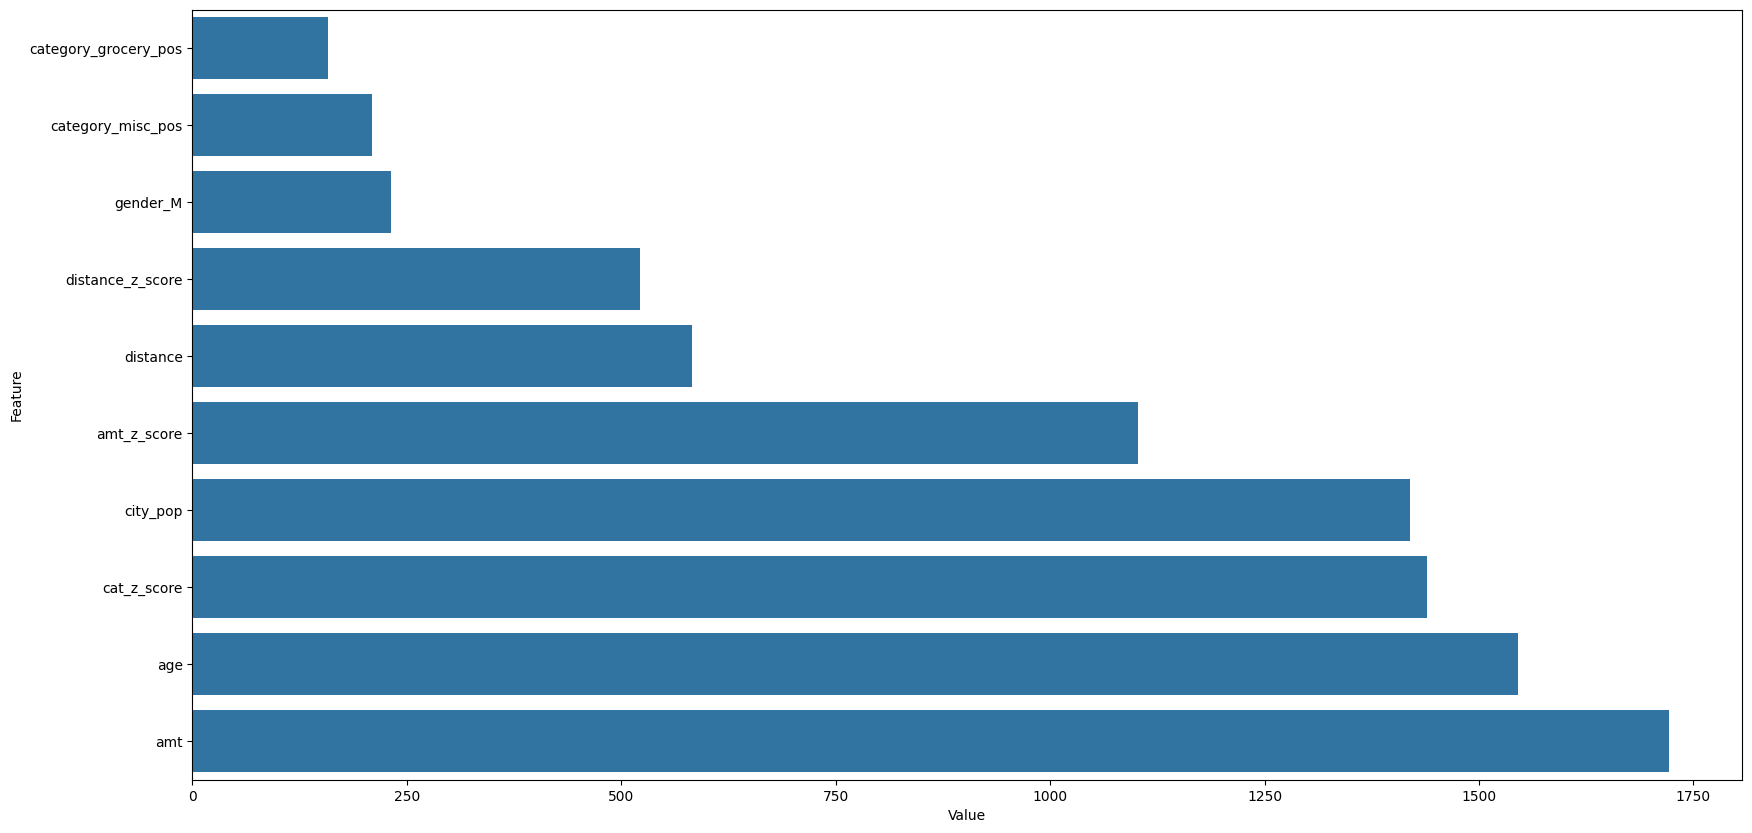

In [177]:
plt.figure(figsize=(20,10))
sns.barplot(x="Value", y="Feature", data=f_imp.tail(10))
plt.show()

In [205]:
[f_imp["Feature"].tail(7).values]

[array(['distance_z_score', 'distance', 'amt_z_score', 'city_pop',
        'cat_z_score', 'age', 'amt'], dtype=object)]

In [206]:
data2 = data[
    [
        "distance_z_score",
        "distance" ,
        "amt_z_score",
        "city_pop",
        "cat_z_score",
        "age",
        "amt",
        "is_fraud",
    ]
]
data2.head(2)

,distance_z_score,distance,amt_z_score,city_pop,cat_z_score,age,amt,is_fraud
trans_date_trans_time,,,,,,,,
2019-01-01 00:00:18,0.030974,78.773821,-0.662108,3495,-0.688297,33,4.97,0
2019-01-01 00:00:44,-1.475224,30.216618,0.321302,149,0.317631,43,107.23,0


In [207]:
train = data2[data2.index < "2020-01-01"]
val = data2[(data2.index >= "2020-01-01") & (data2.index < "2020-07-01")]
test = data2[data2.index >= "2020-07-01"]

X_train = train.drop("is_fraud", axis=1)
X_val = val.drop("is_fraud", axis=1)
X_test = test.drop("is_fraud", axis=1)
y_train = train["is_fraud"]
y_val = val["is_fraud"]
y_test = test["is_fraud"]

In [208]:
d_train = lgb.Dataset(X_train, label=y_train)
d_val = lgb.Dataset(X_val, label=y_val)

In [209]:
params_set = {
    "lambda_l1": 0,
    "lambda_l2": 20,
    "learning_rate": 0.05,
    "max_depth": 15,
    "metric": "auc",
    "n_estimators": 1000,
    "subsample": 1,
}

In [215]:
model_3 = lgb.train(
    params_set,
    d_train,
    valid_sets=[d_val],
    callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(50)],
)

[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=15) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=32768) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=15) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=32768) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=15) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=32768) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=15) without 

In [216]:
pred_3 = model_3.predict(X_test)

In [212]:
roc_auc_score(y_test,pred_3)

np.float64(0.9758188065794472)